# **IMPORTING MODEL BUILDING LIBRARIES**

In [23]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2s
from google.colab import files
from math import sqrt

# **INITIALIZING THE MODEL**

In [24]:
def plotCurve(x,y,xlable,ylabel,clabel):
    fig, ax = plt.subplots(figsize=(5, 3))
    fig.subplots_adjust(bottom=0.15, left=0.2)
    ax.plot(x,y,label=clabel)
    ax.set_xlabel(xlable)
    ax.set_ylabel(ylabel)
    plt.grid()
    ax.legend()
    plt.show()

In [25]:
def plotTwoCurves(x1,x2,y1,y2,xlable,ylabel,clabel1,clabel2):
    fig, ax = plt.subplots(figsize=(5, 3))
    fig.subplots_adjust(bottom=0.15, left=0.2)
    ax.plot(x1,y1,color='blue',label=clabel1)
    ax.plot(x2,y2,color='red',label=clabel2)
    ax.set_xlabel(xlable)
    ax.set_ylabel(ylabel)
    plt.legend()
    plt.show()

In [26]:
ds=pd.read_csv('Crude_Oil_Prices.csv')
ds=ds.set_index(ds['Date'])
ds=ds.dropna()
print(ds)
ds['Date']=pd.to_datetime(ds['Date'])
print(ds['Value'].head())
index1=ds['Date']

                  Date  Value
Date                         
02-01-1986  02-01-1986  25.56
03-01-1986  03-01-1986  26.00
06-01-1986  06-01-1986  26.53
07-01-1986  07-01-1986  25.85
08-01-1986  08-01-1986  25.87
...                ...    ...
20-10-2022  20-10-2022  85.98
21-10-2022  21-10-2022  85.05
24-10-2022  24-10-2022  84.92
25-10-2022  25-10-2022  84.79
26-10-2022  26-10-2022  88.05

[9294 rows x 2 columns]
Date
02-01-1986    25.56
03-01-1986    26.00
06-01-1986    26.53
07-01-1986    25.85
08-01-1986    25.87
Name: Value, dtype: float64


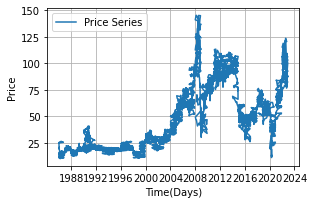

In [27]:
plotCurve(index1,ds['Value'],'Time(Days)','Price','Price Series')

In [28]:
ds_price=ds['Value'].astype(float)
scaler=StandardScaler()
scaler=scaler.fit(ds_price.values.reshape(-1, 1))
ds_price_scaled=scaler.transform(ds_price.values.reshape(-1, 1))
ds_price_scaled

array([[-0.68979433],
       [-0.67488539],
       [-0.65692689],
       ...,
       [ 1.32155776],
       [ 1.31715284],
       [ 1.42761456]])

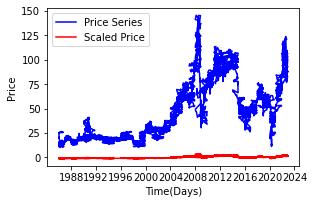

In [29]:
plotTwoCurves(index1,index1,ds['Value'],ds_price_scaled,'Time(Days)','Price','Price Series','Scaled Price')

# **CREATING TRAINING AND TESTING DATA**

In [30]:
oilPX=[]
oilPY=[]
predicted_data=0
actual_data=0
next_period=1
window_size=14

In [31]:
for i in range(window_size, len(ds_price_scaled)-next_period+1):
    oilPX.append(ds_price_scaled[i-window_size:i])
    oilPY.append(ds_price_scaled[i+next_period-1:i+next_period,0])

In [32]:
oilPX,oilPY=np.array(oilPX),np.array(oilPY)

In [33]:
print('shape= {}.'.format(ds.shape))
print('Price Scaled shape= {}.'.format(ds_price_scaled.shape))
print('oilPX shape== {}.'.format(oilPX.shape))
print('oilPY shape== {}.'.format(oilPY.shape))

shape= (9294, 2).
Price Scaled shape= (9294, 1).
oilPX shape== (9280, 14, 1).
oilPY shape== (9280, 1).


# **ADDING LSTM LAYERS**

In [34]:
model=Sequential()
model.add(LSTM(100, activation='relu', input_shape=(oilPX.shape[1], oilPX.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(oilPY.shape[1]))

In [35]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [36]:
history=model.fit(oilPX,oilPY,epochs=30,batch_size=16, validation_split=0.1,verbose=1)
index2=range(0,len(history.history['loss']))

Epoch 1/30
522/522 [==============================] - 11s 16ms/step - loss: 0.0487 - val_loss: 0.0150
Epoch 2/30
522/522 [==============================] - 8s 15ms/step - loss: 0.0236 - val_loss: 0.0154
Epoch 3/30
522/522 [==============================] - 8s 15ms/step - loss: 0.0230 - val_loss: 0.0121
Epoch 4/30
522/522 [==============================] - 8s 15ms/step - loss: 0.0210 - val_loss: 0.0118
Epoch 5/30
522/522 [==============================] - 8s 15ms/step - loss: 0.0225 - val_loss: 0.0119
Epoch 6/30
522/522 [==============================] - 8s 15ms/step - loss: 0.0219 - val_loss: 0.0108
Epoch 7/30
522/522 [==============================] - 8s 15ms/step - loss: 0.0213 - val_loss: 0.0099
Epoch 8/30
522/522 [==============================] - 8s 15ms/step - loss: 0.0210 - val_loss: 0.0077
Epoch 9/30
522/522 [==============================] - 8s 15ms/step - loss: 0.0192 - val_loss: 0.0073
Epoch 10/30
522/522 [==============================] - 8s 15ms/step - loss: 0.0187 - val_l

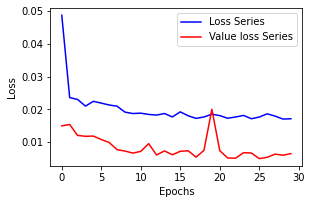

In [37]:
plotTwoCurves(index2,index2,history.history['loss'],history.history['val_loss'],'Epochs','Loss','Loss Series','Value loss Series')